In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Data Cleaning and Visualization

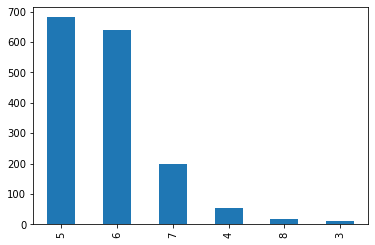

In [3]:
df['quality'].value_counts().plot(kind='bar')
plt.show()

In [4]:
def change(x):
    if (x<6):
        return 'B'
    else:
        return 'A'

In [5]:
df['Class']= df['quality'].apply(change)

A    855
B    744
Name: Class, dtype: int64


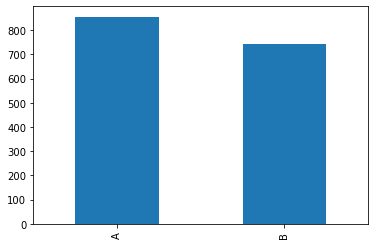

In [6]:
print (df['Class'].value_counts())
df['Class'].value_counts().plot(kind='bar')
plt.show()

#### Assuming 6 and 7 Quality to be good i.e 'A' and below 6 is bad i.e 'B' 

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,B
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,B
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,B
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,A
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,B
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,A
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,A
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,B


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Class                 1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


There are no Null Values

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [10]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.465291
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [12]:
x = df.drop(['quality','Class'],axis=1)
y = df['Class']

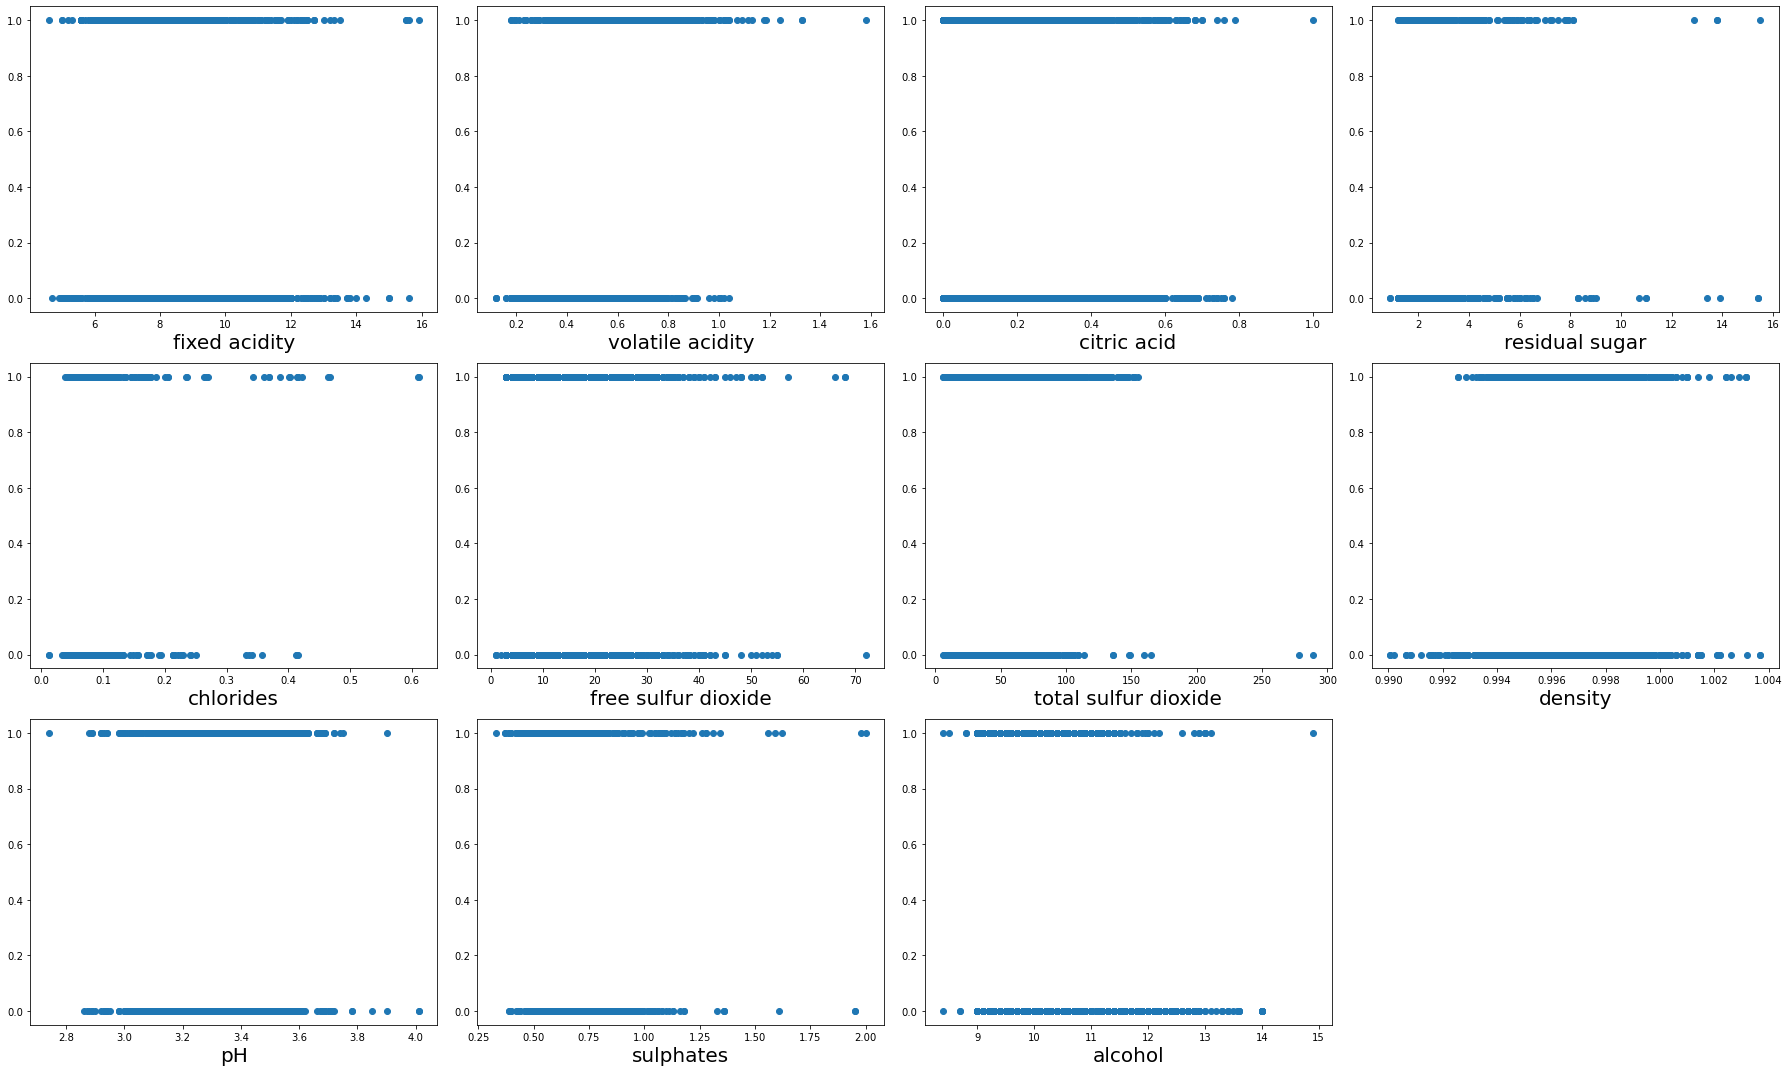

In [13]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

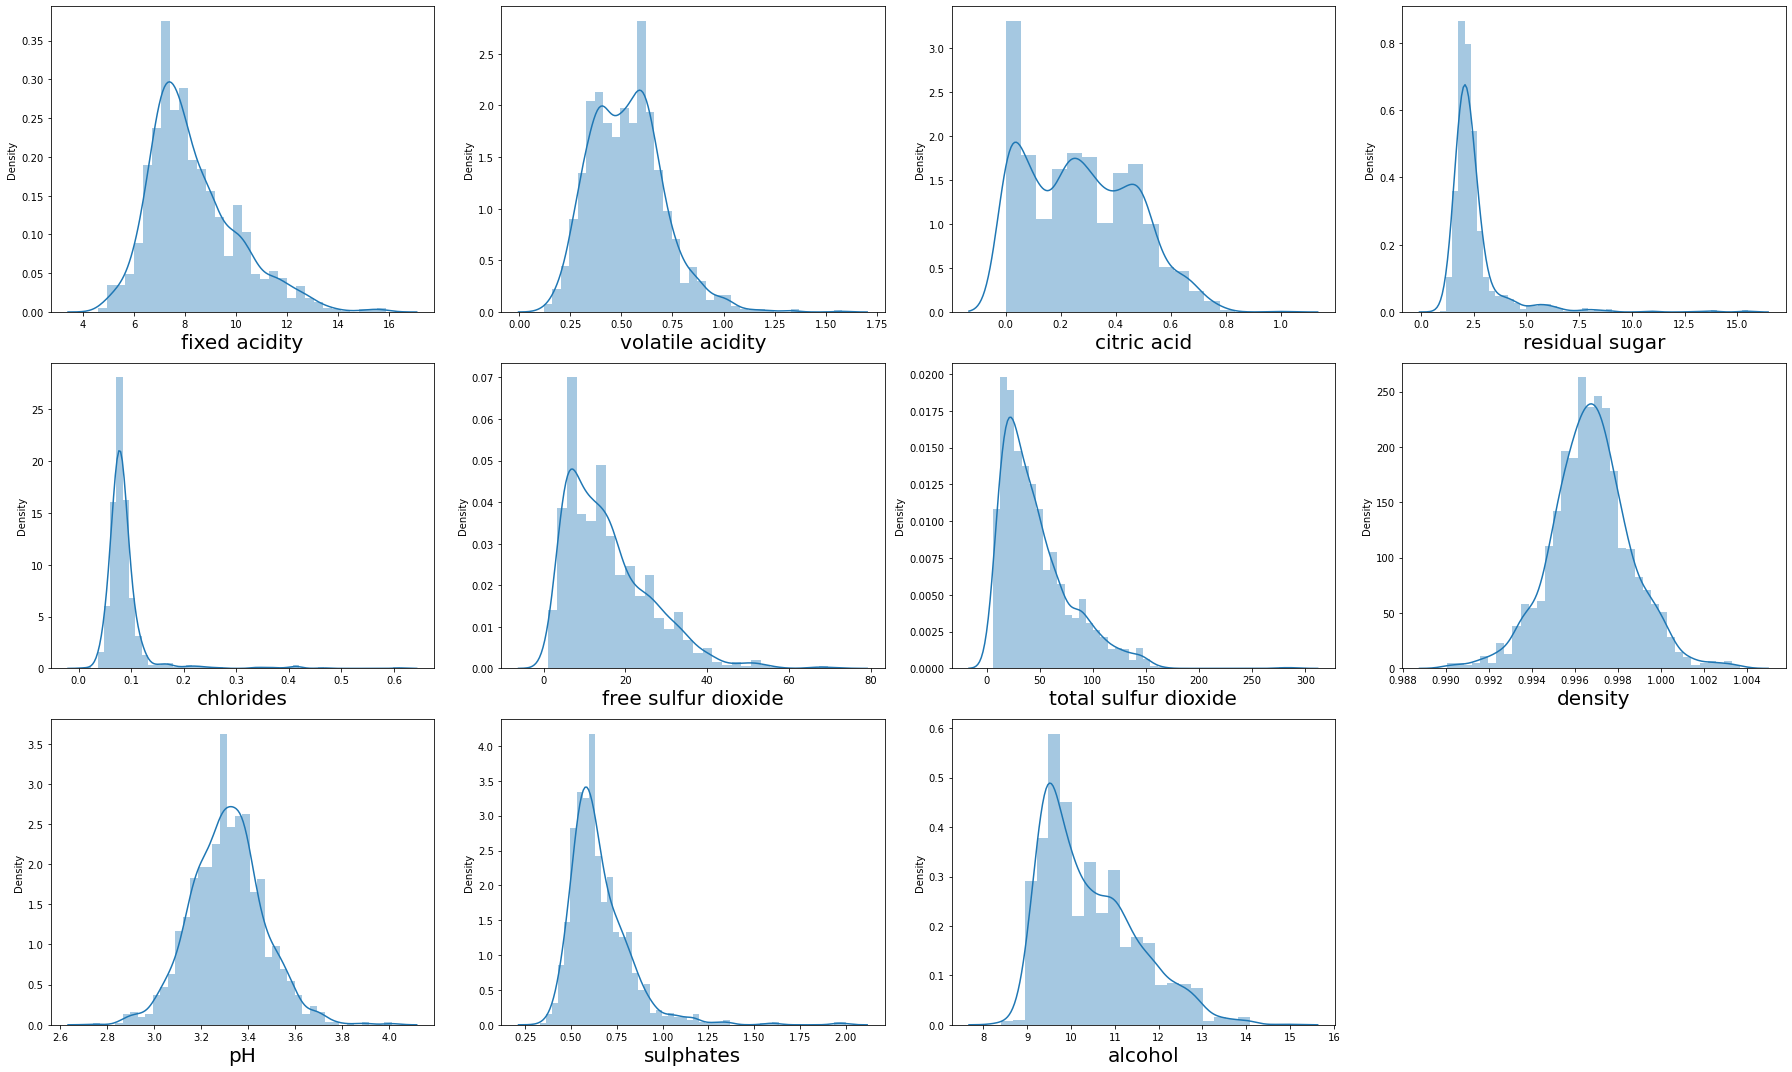

In [14]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

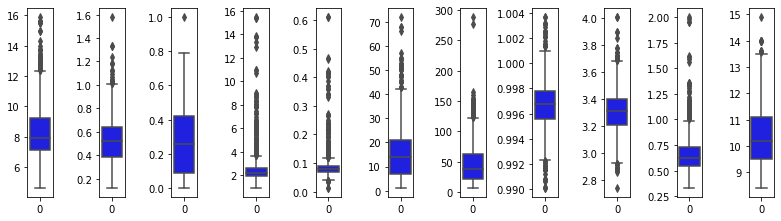

In [15]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

There are many outliers

In [16]:
df.drop('Class',axis=1).corrwith(df.Class)

fixed acidity          -0.095093
volatile acidity        0.321441
citric acid            -0.159129
residual sugar          0.002160
chlorides               0.109494
free sulfur dioxide     0.061757
total sulfur dioxide    0.231963
density                 0.159110
pH                      0.003264
sulphates              -0.218072
alcohol                -0.434751
quality                -0.848279
dtype: float64

In [17]:
df.drop('quality',axis=1, inplace=True)

# Correlation Matrix

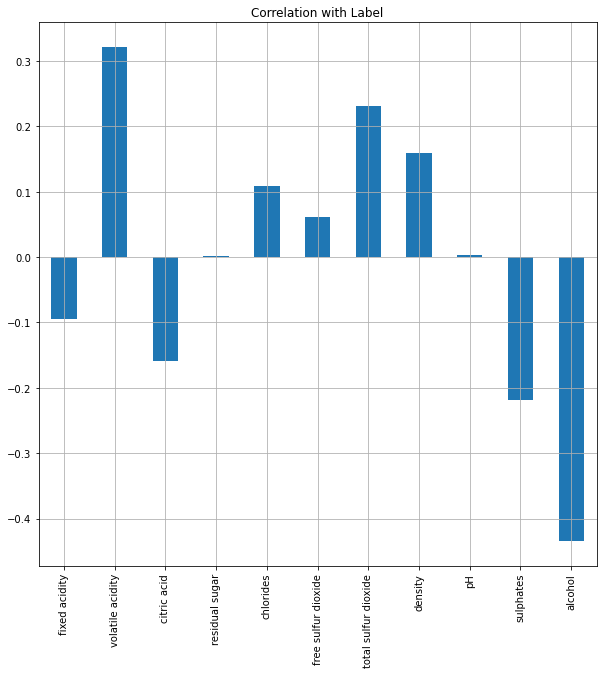

In [18]:
df.drop('Class',axis=1).corrwith(df.Class).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

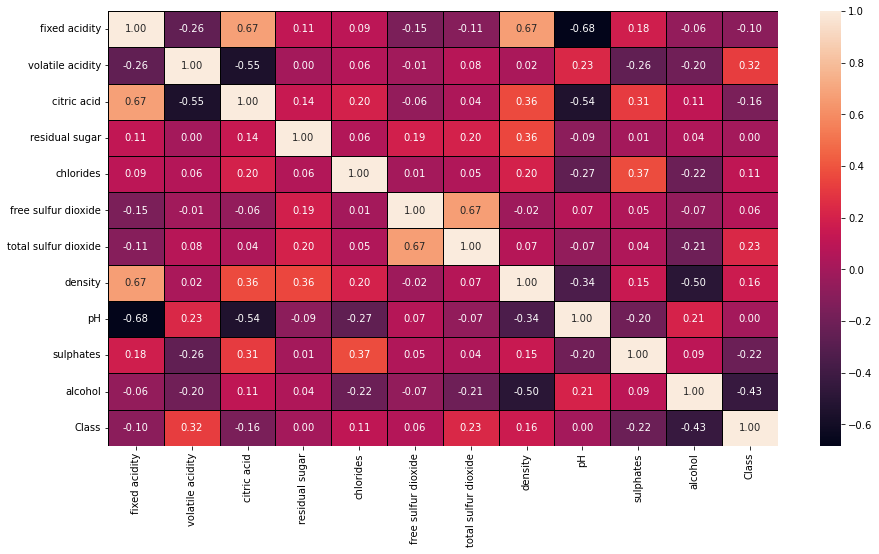

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [20]:
df = df.drop(['residual sugar','free sulfur dioxide','pH'],axis=1)

#### Removed 'residual sugar', 'free sulfur dioxide' and 'pH' since it has low correlation with label

In [21]:
df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,Class
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,1.0
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,1.0
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,1.0
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,0.0
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,1.0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,1.0
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,0.0
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,0.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,1.0


In [22]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'Class'],
      dtype='object')

In [23]:
print('fixed acidity Highest allowed',df['fixed acidity'].mean()+3*df['fixed acidity'].std())
print('fixed acidity Lowest allowed',df['fixed acidity'].mean()-3*df['fixed acidity'].std())
print('\n')
print('volatile acidity Highest allowed',df['volatile acidity'].mean()+3*df['volatile acidity'].std())
print('volatile acidity Lowest allowed',df['volatile acidity'].mean()-3*df['volatile acidity'].std())
print('\n')
print('citric acid Highest allowed',df['citric acid'].mean()+3*df['citric acid'].std())
print('citric acid Lowest allowed',df['citric acid'].mean()-3*df['citric acid'].std())
print('\n')
print('chlorides Highest allowed',df['chlorides'].mean()+3*df['chlorides'].std())
print('chlorides Lowest allowed',df['chlorides'].mean()-3*df['chlorides'].std())
print('\n')
print('total sulfur dioxide Highest allowed',df['total sulfur dioxide'].mean()+3*df['total sulfur dioxide'].std())
print('total sulfur dioxide Lowest allowed',df['total sulfur dioxide'].mean()-3*df['total sulfur dioxide'].std())
print('\n')
print('alcohol Highest allowed',df['alcohol'].mean()+3*df['alcohol'].std())
print('alcohol Lowest allowed',df['alcohol'].mean()-3*df['alcohol'].std())
print('\n')
print('density Highest allowed',df['density'].mean()+3*df['density'].std())
print('density Lowest allowed',df['density'].mean()-3*df['density'].std())
print('\n')
print('sulphates Highest allowed',df['sulphates'].mean()+3*df['sulphates'].std())
print('sulphates Lowest allowed',df['sulphates'].mean()-3*df['sulphates'].std())
print('\n')

fixed acidity Highest allowed 13.54292622767894
fixed acidity Lowest allowed 3.096348318912736


volatile acidity Highest allowed 1.064999625281118
volatile acidity Lowest allowed -0.00935859964009178


citric acid Highest allowed 0.8553790219720501
citric acid Lowest allowed -0.3134278024598572


chlorides Highest allowed 0.22866244761876303
chlorides Lowest allowed -0.053729364441777894


total sulfur dioxide Highest allowed 145.15376580512842
total sulfur dioxide Lowest allowed -52.21818106466563


alcohol Highest allowed 13.619985859988681
alcohol Lowest allowed 7.225980368904325


density Highest allowed 1.0024086810360109
density Lowest allowed 0.9910846773129555


sulphates Highest allowed 1.1666697817972214
sulphates Lowest allowed 0.1496279042565628




In [24]:
df1=df[(df['fixed acidity']<13.54)&(df['fixed acidity']>3.09)]
df1=df[(df['volatile acidity']<1.06)&(df['volatile acidity']>0)]
df1=df[(df['citric acid']<0.85)&(df['citric acid']>-0.31)]
df1=df[(df['chlorides']<0.22)&(df['chlorides']>-0.05)]
df1=df[(df['total sulfur dioxide']<145.15)&(df['total sulfur dioxide']>-52.21)]
df1=df[(df['alcohol']<13.61)&(df['alcohol']>7.22)]
df1=df[(df['density']<1.00)&(df['density']>0.99)]
df1=df[(df['sulphates']<1.16)&(df['sulphates']>0.14)]



#### Removed Outliers

In [25]:
df1

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,Class
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,1.0
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,1.0
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,1.0
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,0.0
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,1.0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,1.0
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,0.0
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,0.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,1.0


In [26]:
df1.reset_index()

,index,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,Class
0,0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,1.0
1,1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,1.0
2,2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,1.0
3,3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,0.0
4,4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,1.0
...,...,...,...,...,...,...,...,...,...,...
1566,1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,1.0
1567,1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,0.0
1568,1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,0.0
1569,1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,1.0


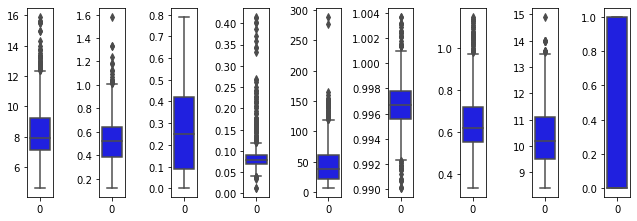

In [27]:
a = df1.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = df1[a[i]],color='blue',orient='v')
    plt.tight_layout()

In [28]:
x = df1.drop('Class',axis=1)
y = df1['Class']

In [29]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)


# Model Building

# DecisionTreeClassifier

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 77)

In [31]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
clf.score(x_train,y_train)

1.0

In [33]:
y_pred = clf.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred)

0.7506361323155216

In [35]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(2,4)
}

In [36]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=7,
                          n_jobs =-1)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [38]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [39]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=3)

In [40]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7557251908396947

In [41]:
clf.score(x_train,y_train)

0.9397283531409168

In [42]:
print('accuracy', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.7557251908396947
[[170  49]
 [ 47 127]]
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78       219
         1.0       0.72      0.73      0.73       174

    accuracy                           0.76       393
   macro avg       0.75      0.75      0.75       393
weighted avg       0.76      0.76      0.76       393



In [43]:
scr_clf = cross_val_score(clf,X_scale,y,cv=5)
print('Cross Validation Score for DecisionTreeClassifier ', scr_clf.mean())
print('\n')

Cross Validation Score for DecisionTreeClassifier  0.6524679001112121




# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 77)

In [46]:
rand = RandomForestClassifier()
rand.fit(x_train,y_train)
y_pred=rand.predict(x_test)
print('accuracy', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.8142493638676844
[[187  32]
 [ 41 133]]
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       219
         1.0       0.81      0.76      0.78       174

    accuracy                           0.81       393
   macro avg       0.81      0.81      0.81       393
weighted avg       0.81      0.81      0.81       393



In [47]:
scr_rand = cross_val_score(rand,X_scale,y,cv=5)
print('Cross Validation Score for Random Forest Classifier ', scr_rand.mean())
print('\n')


Cross Validation Score for Random Forest Classifier  0.732676170255788




# LogisticsRegression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)
    

accuracy 0.7582697201017812 Random_state 1
max_accuracy 0.7582697201017812 max_Random_state 1
accuracy 0.7480916030534351 Random_state 2
accuracy 0.7430025445292621 Random_state 3
accuracy 0.7404580152671756 Random_state 4
accuracy 0.7302798982188295 Random_state 5
accuracy 0.72264631043257 Random_state 6
accuracy 0.7404580152671756 Random_state 7
accuracy 0.7353689567430025 Random_state 8
accuracy 0.7353689567430025 Random_state 9
accuracy 0.7302798982188295 Random_state 10
accuracy 0.7430025445292621 Random_state 11
accuracy 0.7251908396946565 Random_state 12
accuracy 0.7659033078880407 Random_state 13
max_accuracy 0.7659033078880407 max_Random_state 13
accuracy 0.7455470737913485 Random_state 14
accuracy 0.7480916030534351 Random_state 15
accuracy 0.7251908396946565 Random_state 16
accuracy 0.7455470737913485 Random_state 17
accuracy 0.7302798982188295 Random_state 18
accuracy 0.7608142493638677 Random_state 19
accuracy 0.7302798982188295 Random_state 20
accuracy 0.7251908396946565 

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 104)

In [51]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
print('accuracy', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.7913486005089059
[[172  39]
 [ 43 139]]
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       211
         1.0       0.78      0.76      0.77       182

    accuracy                           0.79       393
   macro avg       0.79      0.79      0.79       393
weighted avg       0.79      0.79      0.79       393



In [52]:
scr_log = cross_val_score(log,X_scale,y,cv=5)
print('Cross Validation Score for LogisticsRegression ', scr_log.mean())
print('\n')


Cross Validation Score for LogisticsRegression  0.7352279850369022




# GradientBoostingClassifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 25)

In [54]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
y_pred = gbdt.predict(x_test)


clf_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True))


In [55]:
clf_report.T

,precision,recall,f1-score,support
0.0,0.842365,0.784404,0.812352,218.000000
1.0,0.752632,0.817143,0.783562,175.000000
accuracy,0.798982,0.798982,0.798982,0.798982
macro avg,0.797498,0.800773,0.797957,393.000000
weighted avg,0.802407,0.798982,0.799532,393.000000


In [56]:
accuracy_score(y_test,y_pred)

0.7989821882951654

In [57]:
confusion_matrix(y_test,y_pred)

array([[171,  47],
       [ 32, 143]], dtype=int64)

In [58]:
params = {
          "learning_rate":np.arange(0.1,0.7,0.1),
          "max_depth":range(4,11)        
         }

In [59]:
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=params)


In [60]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
                         'max_depth': range(4, 11)})

In [61]:
y_pred = grid.predict(x_test)

In [62]:
clf_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True))

In [63]:
clf_report.T

,precision,recall,f1-score,support
0.0,0.840796,0.775229,0.806683,218.000000
1.0,0.744792,0.817143,0.779292,175.000000
accuracy,0.793893,0.793893,0.793893,0.793893
macro avg,0.792794,0.796186,0.792987,393.000000
weighted avg,0.798046,0.793893,0.794486,393.000000


In [64]:
accuracy_score(y_test,y_pred)

0.7938931297709924

In [65]:
print('accuracy', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.7938931297709924
[[169  49]
 [ 32 143]]
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       218
         1.0       0.74      0.82      0.78       175

    accuracy                           0.79       393
   macro avg       0.79      0.80      0.79       393
weighted avg       0.80      0.79      0.79       393



In [66]:
scr_gbc = cross_val_score(grid,X_scale,y,cv=5)
print('Cross Validation Score for GradientBoostingClassifier ', scr_gbc.mean())
print('\n')


Cross Validation Score for GradientBoostingClassifier  0.7135941765241128




# Conclusion

- Cross Validation Score for DecisionTreeClassifier 65.24%
- Cross Validation Score for Random Forest Classifier 73.26%
- Cross Validation Score for LogisticsRegression 73.52%
- Cross Validation Score for GradientBoostingClassifier 71.35%


- Accuracy score of DecisionTreeClassifier 76%
- Accuracy score of Random Forest Classifier 81%
- Accuracy score of LogisticsRegression 79%
- Accuracy score of GradientBoostingClassifier 79%

#### Considering the accuracy score of 81% and Cross Validation Score 73.26% we can choose Random Forest Classifier model

# Hyper Tuning of slected Model

In [69]:
params = {    
          "max_features":['auto','sqrt','log2'],
          "max_depth":range(4,11),
          "criterion":['gini','entropy']

         }

In [70]:
GCV = GridSearchCV(RandomForestClassifier(),params,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}

In [71]:
GCV_y_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test, GCV_y_pred)

0.8320610687022901

# ROC AUC Curve

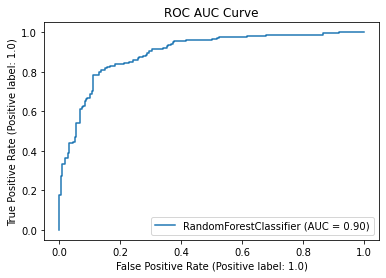

In [72]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Curve")
plt.show()

### Accuracy score of RandomForestClassifier after Tuning the model is 83.20% and AUC score is 90% which is pretty good

# Saving the model

In [73]:
import pickle
file = 'Red_Wine_Quality.pickle'
pickle.dump(GCV.best_estimator_, open(file, 'wb'))